# Project03. 딥러닝 프로젝트

## 과정 개요
* Boston 주택 가격 예측 모델
여러 데이터를 받아서 가격을 예측하는 프로젝트를 진행해봅니다.

* Reuters 딥러닝 모델
시퀀스 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

* CIFAR10 딥러닝 모델
이미지 데이터를 받아서 분류하는 프로젝트를 진행해봅니다.

## 학습 목표
* Boston Housing 데이터셋을 이용해 주택 가격을 예측하는 딥러닝 모델을 실습한다.
* Reuters 데이터셋을 이용해 텍스트로 구성된 뉴스 데이터의 주제를 분류하는 딥러닝 모델을 실습한다.
* CIFAR10 데이터셋을 이용해 여러 객체의 이미지를 분류하는 딥러닝 모델을 실습한다.

# CIFAR10 딥러닝 모델
* 32x32 픽셀의 60000개 컬러 이미지가 포함
* 각 이미지는 10개의 클래스로 라벨링
* MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 데이터셋
* 데이터셋 이미지를 보면 거의 비슷한 것보다, 동일한 분류이지만 제각각인 배경과 모습을 가지는 이미지들로 구성되어 있다. - **어려운 문제에 해당되는 데이터셋이다.**
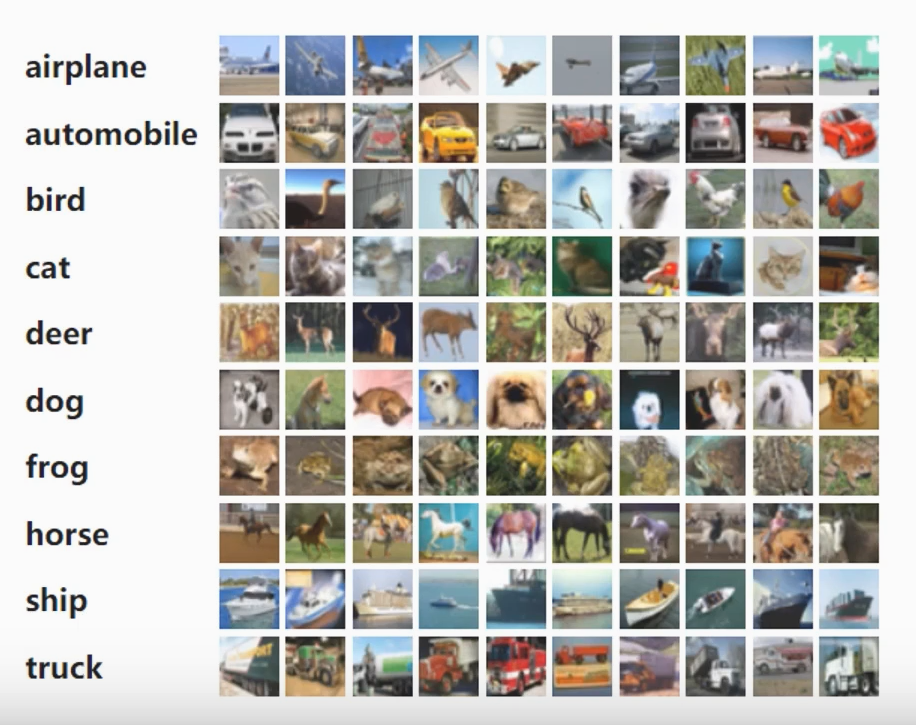

### 데이터 전처리
* 32 * 32 * 3 크기의 이미지를 3072 크기로 변형(reshape) - 여기에서 3은 채널 정보이다.
* 0 ~ 255 사이의 값을 가지는 이미지를 0~1 사이의 값으로 변환

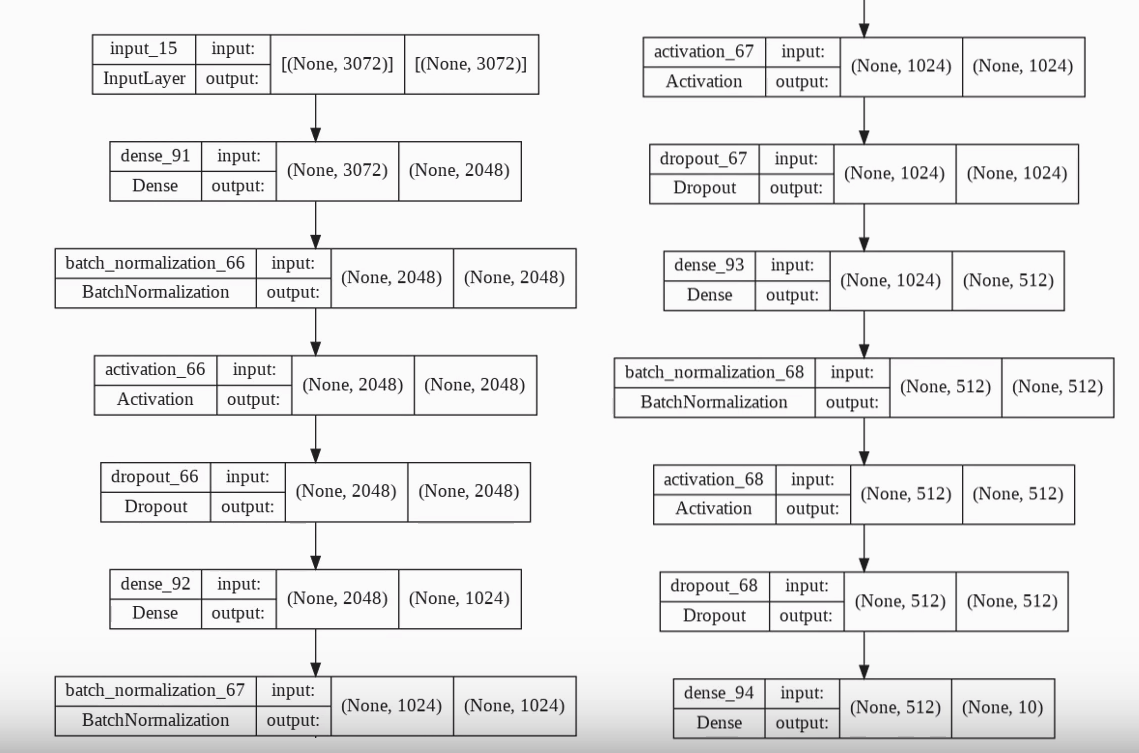
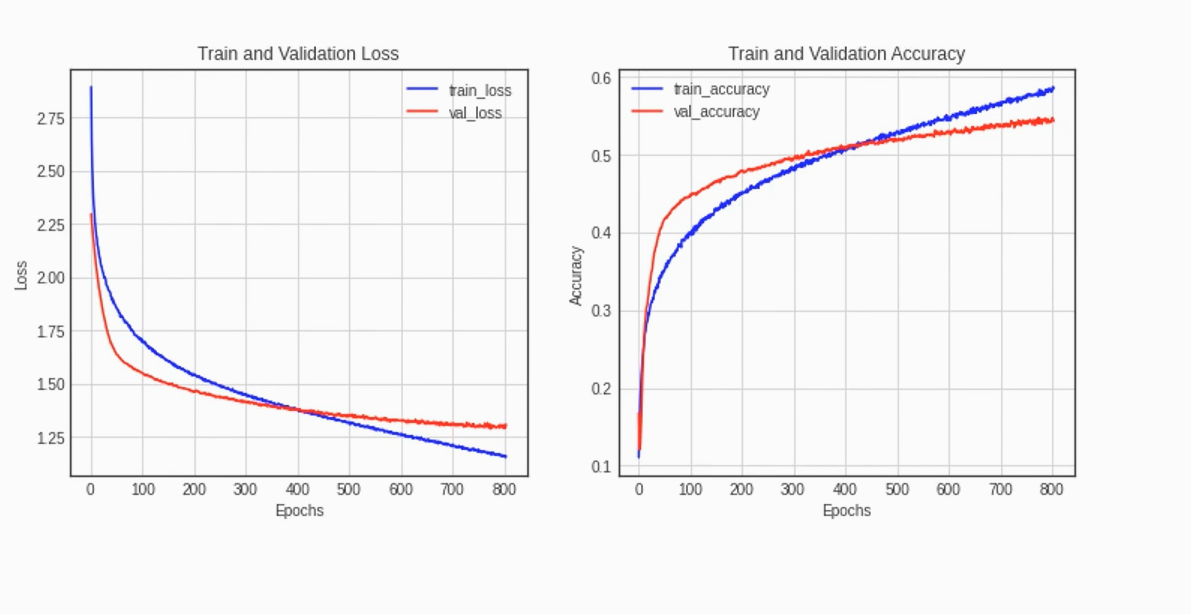

### 데이터 로드 및 전처리
* CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리한다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용한다.
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [4]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)         

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [5]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해본다.

<function matplotlib.pyplot.show(close=None, block=None)>

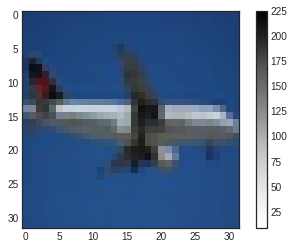

In [6]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show

In [7]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [9]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255. # 브로드 캐스트 기능 때문에 형상이 달라도 연산이 가능
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성한다.

In [10]:
# BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout

model = models.Sequential()
model.add(layers.Dense(2048, input_shape=(3072, )))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax')) # 10개로 분류하는 다중 분류이기 때문에 'softmax' 함수를 사용

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])            

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              6293504   
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0

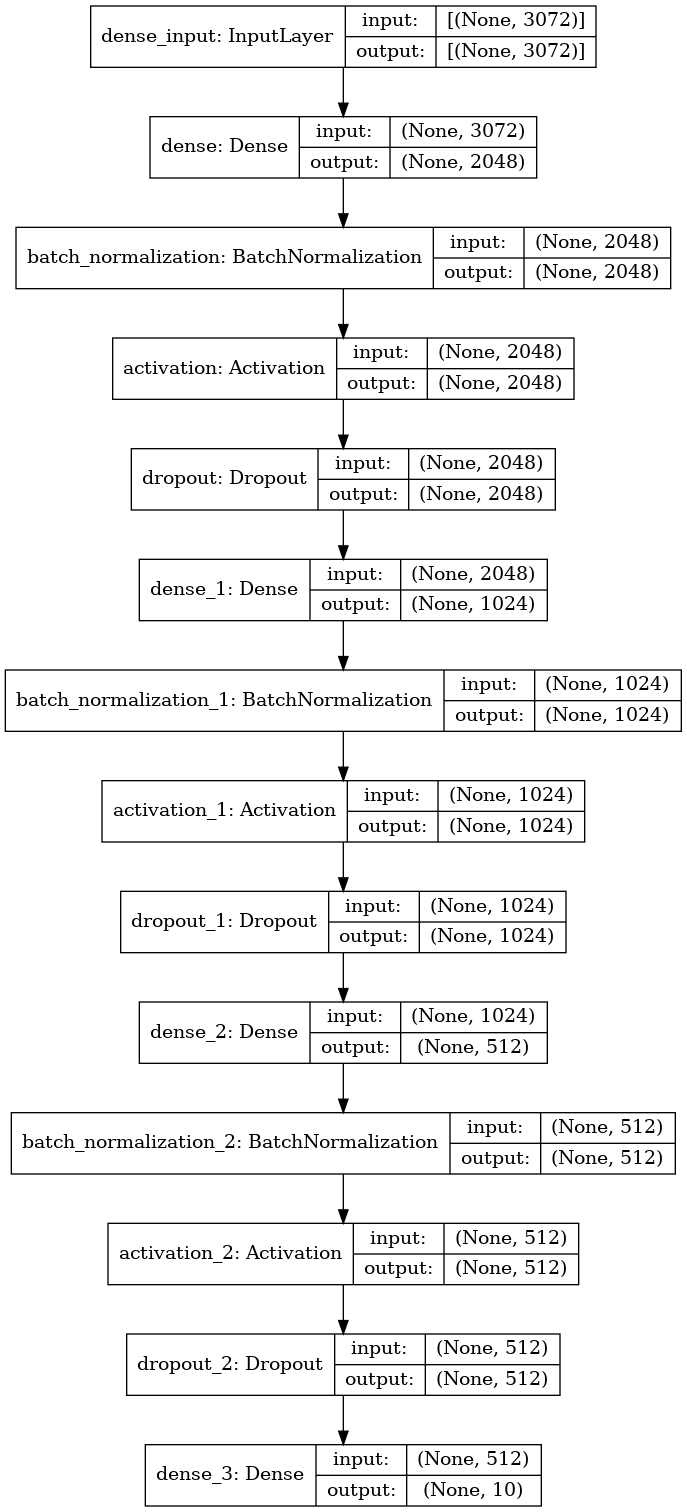

In [12]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

### 모델 학습
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행

In [13]:
# ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifal10_model.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
1250/1250 [==============================] - 9s 5ms/step - loss: 1.9542 - accuracy: 0.3220 - val_loss: 1.7369 - val_accuracy: 0.3790
Epoch 2/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6649 - accuracy: 0.4020 - val_loss: 1.6844 - val_accuracy: 0.4015
Epoch 3/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5914 - accuracy: 0.4324 - val_loss: 1.6630 - val_accuracy: 0.4083
Epoch 4/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5422 - accuracy: 0.4511 - val_loss: 1.5464 - val_accuracy: 0.4454
Epoch 5/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4931 - accuracy: 0.4657 - val_loss: 1.4885 - val_accuracy: 0.4676
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4587 - accuracy: 0.4789 - val_loss: 1.7043 - val_accuracy: 0.4040
Epoch 7/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4261 - accuracy: 0.4906 - val_loss: 1.5261 - val_accuracy:

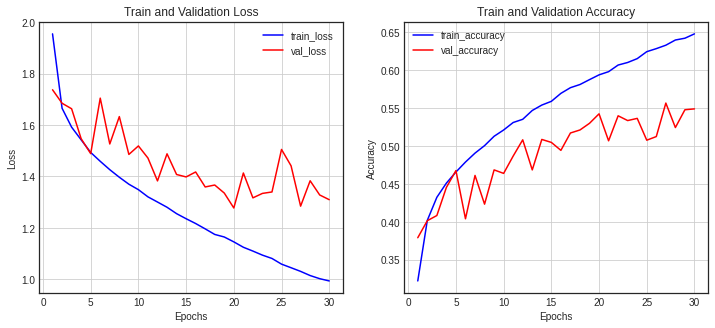

In [14]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 결과를 보니 훈련과 검증의 정확도가 65퍼센트 이하인 것을 보아 모델의 성능이 떨어진다는 것을 알 수 있다.
* 검증은 그래프를 보면 자주 튕기는 것을 볼 수 있는데, 모델이 불안한 성능을 가지고 있다는 것을 알 수 있다.

In [15]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 1.2692 - accuracy: 0.5444
test_loss: 1.2692046165466309
test_accuracy: 0.5443999767303467


* l2 규제를 적용
* He 초기값 설정
* 학습률 설정
* Dense의 유닛수를 줄임

In [26]:
# BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, input_shape=(3072, ),
                      kernel_regularizer=regularizers.l2(0.001),
                      kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(256,
          kernel_regularizer=regularizers.l2(0.001),
          kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(128, 
          kernel_regularizer=regularizers.l2(0.001),
          kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax')) # 10개로 분류하는 다중 분류이기 때문에 'softmax' 함수를 사용

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               1573376   
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
activation_10 (Activation)   (None, 256)              

* epochs 수를 100으로 늘린다.
* batch_size를 512로

In [27]:
history2 = model.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
79/79 [==============================] - 2s 14ms/step - loss: 3.9195 - accuracy: 0.2319 - val_loss: 3.5478 - val_accuracy: 0.2633
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 3.1644 - accuracy: 0.3059 - val_loss: 2.8861 - val_accuracy: 0.3364
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 2.7049 - accuracy: 0.3485 - val_loss: 2.5637 - val_accuracy: 0.3668
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 2.4219 - accuracy: 0.3733 - val_loss: 2.4320 - val_accuracy: 0.3590
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 2.2339 - accuracy: 0.3923 - val_loss: 2.3395 - val_accuracy: 0.3417
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 2.1138 - accuracy: 0.4044 - val_loss: 2.2291 - val_accuracy: 0.3551
Epoch 7/100
79/79 [==============================] - 1s 8ms/step - loss: 2.0236 - accuracy: 0.4150 - val_loss: 2.1512 - val_accuracy: 0.3843
Epoch 8/100


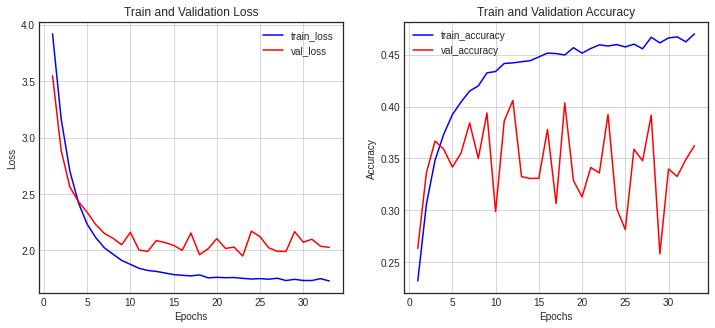

In [28]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history2.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

훈련과 검증의 정확도는 둘 다 낮고, 검증 정확도의 그래프 선을 보면 너무 들쑥날쑥한 것을 볼 수있다. 모델의 성능이 여전히 개선되지 않고, 오히려 떨어진 모습이다.

In [41]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 2.3633 - accuracy: 0.3244
test_loss: 2.363333225250244
test_accuracy: 0.32440000772476196


* 오히려 첫 학습이 더 좋은 결과를 보여줬다. 하지만 강사님이 보여주신 예쁜 그래프가 나오지 않았고, 검증 loss와 accuracy가 들쑥날쑥한 것과 정확도의 점수가 높지 못 한 점을 봤을 때 모델의 성능이 좋지 못 한 것을 알 수있었다.
* 뒤에 CV 노드 학습을 진행하고 프로젝트를 진행했기 때문에, 이미지 데이터를 완전연결계층으로 학습시킬 경우 입력 데이터에 벡터가 들어가면 이미지 데이터의 특징을 없애버린다는 것을 배웠다. 노드 학습을 더 진행해야겠지만, 아마도 CNN을 사용해서 특징을 뽑아준 후 완전연결계층으로 입력해주면, 이미지 데이터의 특징을 잃지 않고, 오히려 다양한 특징을 뽑아서 모델의 성능이 더 좋아질 것이라는 추측이 된다.
* 시간이 부족해서 CNN을 진행하지는 못 했다. 주말에 시간을 내서 CNN까지 진행해봐야겠다. (CNN 복습이 매우 필요하다!)